Rxx_Matrix [[ 7.46418327e-01  6.61839424e-04  9.92950951e-04 ...  1.05819290e-02
   8.03165085e-03  3.01709088e-03]
 [ 6.61839424e-04  7.46418327e-01  6.61839424e-04 ... -5.94014802e-03
   1.05819290e-02  8.03165085e-03]
 [ 9.92950951e-04  6.61839424e-04  7.46418327e-01 ... -5.30295898e-03
  -5.94014802e-03  1.05819290e-02]
 ...
 [ 1.05819290e-02 -5.94014802e-03 -5.30295898e-03 ...  7.46418327e-01
   6.61839424e-04  9.92950951e-04]
 [ 8.03165085e-03  1.05819290e-02 -5.94014802e-03 ...  6.61839424e-04
   7.46418327e-01  6.61839424e-04]
 [ 3.01709088e-03  8.03165085e-03  1.05819290e-02 ...  9.92950951e-04
   6.61839424e-04  7.46418327e-01]]


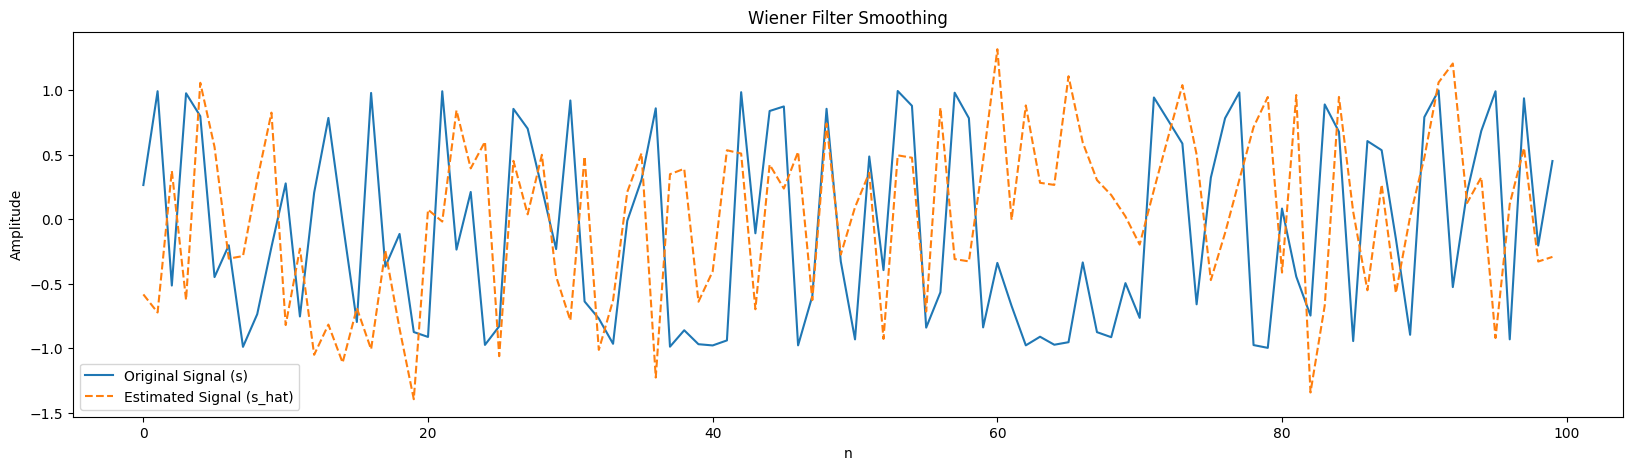

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz

# Parameters
N = 4000 
Ac = 1  
wc = 0.1 * np.pi 
phi = np.random.uniform(0, 2 * np.pi) 

sigma_w = 0.5

phi_n = np.random.uniform(0, 2 * np.pi, N)
s = Ac * np.cos(wc * N + phi_n)

w = np.random.normal(0, sigma_w, N)

x = s + w


Rxx = np.correlate(x, x, mode='full') / N
Rxx = Rxx[N-1:]
#print(f'Rxx',Rxx)

Rxx_matrix = toeplitz(Rxx[:100])
print(f'Rxx_Matrix',Rxx_matrix)

sigma_w_sq = sigma_w ** 2
Rww_matrix = sigma_w_sq * np.eye(100)

# Wiener filter calculation
W = Rxx_matrix @ np.linalg.inv(Rxx_matrix + Rww_matrix)

# Apply Wiener filter
s_hat = np.convolve(x, W[0, :], mode='same')

graph_length = 100
# Plot results
plt.figure(figsize=(20, 5))
plt.plot(s[:graph_length], label='Original Signal (s)')
plt.plot(s_hat[:graph_length], label='Estimated Signal (s_hat)', linestyle='dashed')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Wiener Filter Smoothing')
plt.legend()
plt.show()
